In [7]:
import pandas as pd
import spacy
import seaborn as sns

In [8]:
from tqdm.auto import tqdm
tqdm.pandas()

In [9]:
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner','textcat'])

In [10]:
negation_list = ['not',
'no',
'don',
'don\'t',
'ain',
'aren',
'aren\'t',
'couldn',
'couldn\'t',
'didn',
'didn\'t',
'doesn',
'doesn\'t',
'hadn',
'hadn\'t',
'hasn',
'hasn\'t',
'haven',
'haven\'t',
'isn',
'isn\'t',
'mightn',
'mightn\'t',
'mustn',
'mustn\'t',
'needn',
'needn\'t',
'shan',
'shan\'t',
'shouldn',
'shouldn\'t',
'wasn',
'wasn\'t',
'weren',
'weren\'t',
'won',
'won\'t',
'wouldn',
'wouldn\'t']

In [11]:
for i in negation_list:
    nlp.vocab[i].is_stop = False

In [12]:
df=pd.read_csv("LatestData.csv")

In [13]:
df.head()

,id,text,class,sentiment,label
0,1,It was an overall good experience. The waiting...,NaN,NaN,1Positive#Staff
1,2,Been there recently. Long queue as the clinic ...,NaN,NaN,1Negative#Appointments#Staff
2,3,If this is not your panel clinic so that you c...,NaN,NaN,1Negative#Appointments#Staff
3,4,Waited for more than 2 hours just to vist a do...,NaN,NaN,1Negative#Appointments#Staff#Treatment
4,5,nearby to setapak central\r\nwith other shoplo...,NaN,NaN,1Positive#Facilities#Staff


In [14]:
def clean_text(text):
    text = text.lower()
    doc = nlp(text)
    
    text = ' '.join(token.lemma_ for token in doc if
              not token.is_punct
              and not token.is_currency
              and not token.is_digit
              and not token.is_space
              and not token.is_stop
                   )
    return text

In [15]:
df['text'] = df['text'].progress_apply(lambda x:clean_text(x))

100%|██████████| 1373/1373 [00:07<00:00, 190.70it/s]


In [16]:
dummies=df["label"].str.get_dummies("#")

In [17]:
dummies

,1Negative,1Positive,Appointments,Facilities,Staff,Treatment
0,0,1,0,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,1,0
3,1,0,1,0,1,1
4,0,1,0,1,1,0
...,...,...,...,...,...,...
1368,1,0,1,0,1,0
1369,0,1,0,0,1,1
1370,0,1,0,0,1,1
1371,0,1,0,0,0,1


In [18]:
df

,id,text,class,sentiment,label
0,1,overall good experience waiting time long queu...,NaN,NaN,1Positive#Staff
1,2,recently long queue clinic provide vaccine inj...,NaN,NaN,1Negative#Appointments#Staff
2,3,not panel clinic claim seriously pain clinic l...,NaN,NaN,1Negative#Appointments#Staff
3,4,wait hour vist doctor sufferre patient need me...,NaN,NaN,1Negative#Appointments#Staff#Treatment
4,5,nearby setapak central shoplot buy medicine st...,NaN,NaN,1Positive#Facilities#Staff
...,...,...,...,...,...
1368,1371,unfriendly staff directly wait hour not directly,NaN,NaN,1Negative#Appointments#Staff
1369,1372,good nurse good service,NaN,NaN,1Positive#Staff#Treatment
1370,1373,good service efficient staff,NaN,NaN,1Positive#Staff#Treatment
1371,1374,good service,NaN,NaN,1Positive#Treatment


In [19]:
df=pd.concat([df,dummies],axis=1)

In [20]:
df

,id,text,class,sentiment,label,1Negative,1Positive,Appointments,Facilities,Staff,Treatment
0,1,overall good experience waiting time long queu...,NaN,NaN,1Positive#Staff,0,1,0,0,1,0
1,2,recently long queue clinic provide vaccine inj...,NaN,NaN,1Negative#Appointments#Staff,1,0,1,0,1,0
2,3,not panel clinic claim seriously pain clinic l...,NaN,NaN,1Negative#Appointments#Staff,1,0,1,0,1,0
3,4,wait hour vist doctor sufferre patient need me...,NaN,NaN,1Negative#Appointments#Staff#Treatment,1,0,1,0,1,1
4,5,nearby setapak central shoplot buy medicine st...,NaN,NaN,1Positive#Facilities#Staff,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1368,1371,unfriendly staff directly wait hour not directly,NaN,NaN,1Negative#Appointments#Staff,1,0,1,0,1,0
1369,1372,good nurse good service,NaN,NaN,1Positive#Staff#Treatment,0,1,0,0,1,1
1370,1373,good service efficient staff,NaN,NaN,1Positive#Staff#Treatment,0,1,0,0,1,1
1371,1374,good service,NaN,NaN,1Positive#Treatment,0,1,0,0,0,1


In [21]:
df.loc[df["1Positive"]==1,"sentiment"]=1
df.loc[df["1Positive"]==0,"sentiment"]=0

In [22]:
df

,id,text,class,sentiment,label,1Negative,1Positive,Appointments,Facilities,Staff,Treatment
0,1,overall good experience waiting time long queu...,NaN,1.0,1Positive#Staff,0,1,0,0,1,0
1,2,recently long queue clinic provide vaccine inj...,NaN,0.0,1Negative#Appointments#Staff,1,0,1,0,1,0
2,3,not panel clinic claim seriously pain clinic l...,NaN,0.0,1Negative#Appointments#Staff,1,0,1,0,1,0
3,4,wait hour vist doctor sufferre patient need me...,NaN,0.0,1Negative#Appointments#Staff#Treatment,1,0,1,0,1,1
4,5,nearby setapak central shoplot buy medicine st...,NaN,1.0,1Positive#Facilities#Staff,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1368,1371,unfriendly staff directly wait hour not directly,NaN,0.0,1Negative#Appointments#Staff,1,0,1,0,1,0
1369,1372,good nurse good service,NaN,1.0,1Positive#Staff#Treatment,0,1,0,0,1,1
1370,1373,good service efficient staff,NaN,1.0,1Positive#Staff#Treatment,0,1,0,0,1,1
1371,1374,good service,NaN,1.0,1Positive#Treatment,0,1,0,0,0,1


In [23]:
df['pairs'] = df.progress_apply(lambda x: (x['text'],x['Appointments'],x['Facilities'],x['Staff'],x['Treatment']), axis=1)

100%|██████████| 1373/1373 [00:00<00:00, 42909.36it/s]


In [24]:
df = df.drop(['pairs'], axis = 1)

In [25]:
# class_label=df[["Appointments","Facilities","Staff","Treatment"]].to_numpy()
# sentiment=df[["sentiment"]].to_numpy()
# input_text=df[["text"]].to_numpy()

In [26]:
dummies = dummies.drop(['1Positive', '1Negative'], axis = 1)

In [27]:
label = list(dummies.columns)
label

['Appointments', 'Facilities', 'Staff', 'Treatment']

In [28]:
y = dummies.to_dict('index')
y

{0: {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 0},
 1: {'Appointments': 1, 'Facilities': 0, 'Staff': 1, 'Treatment': 0},
 2: {'Appointments': 1, 'Facilities': 0, 'Staff': 1, 'Treatment': 0},
 3: {'Appointments': 1, 'Facilities': 0, 'Staff': 1, 'Treatment': 1},
 4: {'Appointments': 0, 'Facilities': 1, 'Staff': 1, 'Treatment': 0},
 5: {'Appointments': 1, 'Facilities': 0, 'Staff': 0, 'Treatment': 0},
 6: {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 1},
 7: {'Appointments': 1, 'Facilities': 0, 'Staff': 0, 'Treatment': 0},
 8: {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 1},
 9: {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 1},
 10: {'Appointments': 1, 'Facilities': 0, 'Staff': 1, 'Treatment': 1},
 11: {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 0},
 12: {'Appointments': 1, 'Facilities': 0, 'Staff': 0, 'Treatment': 0},
 13: {'Appointments': 1, 'Facilities': 0, 'Staff': 0, 'Treatment': 0},
 14: {'Appointme

In [29]:
dataset = list(zip(df['text'],[{'cats': cats} for cats in y.values()]))
print(dataset[0])

('overall good experience waiting time long queue okay like dr hanifah doctor listen try understand go thank doc close setapak sentral incase need buy check columbia hospital incase need hospital referral lot food option', {'cats': {'Appointments': 0, 'Facilities': 0, 'Staff': 1, 'Treatment': 0}})


In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=13)

In [24]:
from spacy.tokens import DocBin

In [ ]:
def make_docs(data):
    docs = []
    with nlp.disable_pipes(["textcat"]):
        for doc, label in nlp.pipe(data, as_tuples=True):
            target = list(label['cats'].values())
            doc.cats['Appointments'] = target[0]
            doc.cats['Facilities'] = target[1]
            doc.cats['Staff'] = target[2]
            doc.cats['Treatment'] = target[3]

            docs.append(doc)
    return docs

In [ ]:
training_docs = make_docs(train_data)
doc_bin = DocBin(docs=training_docs)
doc_bin.to_disk('./data/training.spacy')

In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Multiclass Classification Model

In [ ]:
!python -m spacy init fill-config ./configs/base_config.cfg ./configs/config.cfg

In [ ]:
!python -m spacy train ./configs/config.cfg --output ./output --paths.train ./data/training.spacy

In [31]:
def evaluate_model(data,model,threshold = 0.5):
    true_count = 0
    target_list = []
    pred_list = []
    for doc, label in tqdm(model.pipe(data, as_tuples=True)):
        target = list(label['cats'].values())
        pred = list(doc.cats.values())
        target_list.append(target)
        pred_list.append([1 if prediction>=threshold else 0 for prediction in pred])

    return target_list,pred_list

    # print(f"Model's accuracy ({threshold}): {(true_count/len(data))*100}")

In [32]:
nlp_model = spacy.load("./output/model-best/")

In [50]:
evaluate_model(test_data,nlp_model)

275it [00:00, 1470.59it/s]

Model's accuracy: 87.0


In [29]:
doc = nlp_model(clean_text("i dont have to wait too long"))
doc.cats

{'Appointments': 0.9998927116394043,
 'Facilities': 2.268859361720388e-06,
 'Staff': 9.503335604676977e-05,
 'Treatment': 2.0893415353384626e-07}

### Sentiment Model

In [30]:
df.head()

,id,text,class,sentiment,label,1Negative,1Positive,Appointments,Facilities,Staff,Treatment
0,1,overall good experience waiting time long queu...,NaN,1.0,1Positive#Staff,0,1,0,0,1,0
1,2,recently long queue clinic provide vaccine inj...,NaN,0.0,1Negative#Appointments#Staff,1,0,1,0,1,0
2,3,not panel clinic claim seriously pain clinic l...,NaN,0.0,1Negative#Appointments#Staff,1,0,1,0,1,0
3,4,wait hour vist doctor sufferre patient need me...,NaN,0.0,1Negative#Appointments#Staff#Treatment,1,0,1,0,1,1
4,5,nearby setapak central shoplot buy medicine st...,NaN,1.0,1Positive#Facilities#Staff,0,1,0,1,1,0


In [31]:
def rounding(value):
    return int(value)

In [32]:
df['sentiment'] = df['sentiment'].progress_apply(lambda x: rounding(x))

100%|██████████| 1373/1373 [00:00<00:00, 451917.08it/s]


In [33]:
df['pairs'] = df.progress_apply(lambda x: (x['text'],x['sentiment']), axis=1)

df['pairs'].head()

100%|██████████| 1373/1373 [00:00<00:00, 47343.59it/s]


0    (overall good experience waiting time long que...
1    (recently long queue clinic provide vaccine in...
2    (not panel clinic claim seriously pain clinic ...
3    (wait hour vist doctor sufferre patient need m...
4    (nearby setapak central shoplot buy medicine s...
Name: pairs, dtype: object

In [34]:
train, test = train_test_split(df,stratify=df['sentiment'],test_size=0.2, random_state=10)
train, val = train_test_split(train,stratify=train['sentiment'],test_size=0.1, random_state=10)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

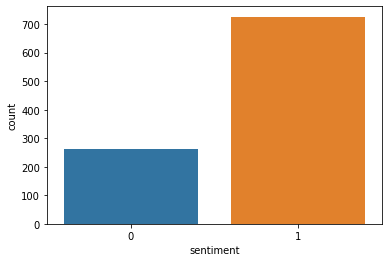

In [35]:
sns.countplot(data=train, x='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

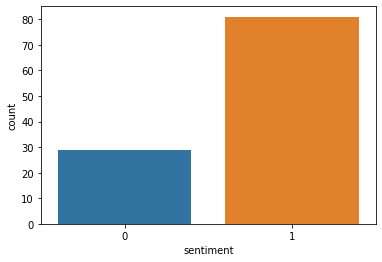

In [36]:
sns.countplot(data=val, x='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

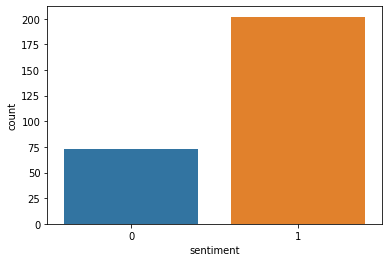

In [37]:
sns.countplot(data=test, x='sentiment')

In [38]:
train_data_sentiment = train['pairs'].tolist()
test_data_sentiment = test['pairs'].tolist()
val_data_sentiment = val['pairs'].tolist()

In [ ]:
def make_docs_sentiment(data):
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):
        if label == 0:
            doc.cats['NEGATIVE'] = 1
            doc.cats['POSITIVE'] = 0
        else:
            doc.cats['NEGATIVE'] = 0
            doc.cats['POSITIVE'] = 1
        docs.append(doc)
    return docs

In [ ]:
training_docs = make_docs_sentiment(train_data_sentiment)
doc_bin = DocBin(docs=training_docs)
doc_bin.to_disk('./data/training_sentiment.spacy')

validation_docs = make_docs_sentiment(val_data_sentiment)
doc_bin = DocBin(docs=validation_docs)
doc_bin.to_disk('./data/validation_sentiment.spacy')

In [ ]:
!python -m spacy init fill-config ./configs/base_config_sentiment.cfg ./configs/config_sentiment.cfg

In [ ]:
!python -m spacy train ./configs/config_sentiment.cfg --output ./output_sentiment --paths.train ./data/training_sentiment.spacy --paths.dev ./data/validation_sentiment.spacy

In [39]:
def evaluate_sentiment_model(data,model):
    true_count = 0
    for doc, label in tqdm(model.pipe(data, as_tuples=True)):
        if label == 0:
            if doc.cats['NEGATIVE'] > 0.5:
                true_count += 1            
        else:
            if doc.cats['POSITIVE'] > 0.5:
                true_count += 1    

    print(f"Model's accuracy: {(true_count/len(data))*100}")

In [40]:
nlp_sentiment_model = spacy.load("./output_sentiment/model-best")

In [41]:
evaluate_sentiment_model(test_data_sentiment,nlp_sentiment_model)

275it [00:00, 2052.24it/s]

Model's accuracy: 95.63636363636364


In [ ]:
doc_sentiment = nlp_sentiment_model(clean_text("firstly, all nurses are friendly, and the room is clean"))
doc_sentiment.cats

In [ ]:
doc_sentiment = nlp_sentiment_model(clean_text("the staff are rude"))
doc_sentiment.cats

In [ ]:
review = "firstly, all nurses are friendly, and the food is beyond good"
review = clean_text(review)

class_doc = nlp_model(review)
sentiment_doc = nlp_sentiment_model(review)

print(class_doc.cats)
print(sentiment_doc.cats)

In [ ]:
review = "the nurse very rude, i hate them. and room is very dirty"
review = clean_text(review)

class_doc = nlp_model(review)
sentiment_doc = nlp_sentiment_model(review)

print(class_doc.cats)
print(sentiment_doc.cats)

In [42]:
review = "i dont have to wait too long"
review = clean_text(review)

class_doc = nlp_model(review)
sentiment_doc = nlp_sentiment_model(review)

print(class_doc.cats)
print(sentiment_doc.cats)

{'Appointments': 0.9998927116394043, 'Facilities': 2.268859361720388e-06, 'Staff': 9.503335604676977e-05, 'Treatment': 2.0893415353384626e-07}
{'NEGATIVE': 0.816281259059906, 'POSITIVE': 0.18371877074241638}


### Identify the best threshold for the optimized precision and recall

In [37]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [34]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
precision_hist = []
recall_hist = []

for threshold in thresholds:
    target_list, pred_list = evaluate_model(test_data,nlp_model,threshold)
    # print(multilabel_confusion_matrix(target_list, pred_list))
    label_names = ['Appointments', 'Facilities', 'Staff', 'Treatment']
    precision_hist.append(classification_report(target_list, pred_list,target_names=label_names,output_dict=True)['macro avg']['precision'])
    recall_hist.append(classification_report(target_list, pred_list,target_names=label_names,output_dict=True)['macro avg']['recall'])

print(thresholds)
print(precision_hist)
print(recall_hist)


275it [00:00, 1636.78it/s]
c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
275it [00:00, 2865.73it/s]
c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parame

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.7523034398034398, 0.7637190200244356, 0.778893183596379, 0.7781191897883295, 0.7816994710419128, 0.7842326646128422, 0.7874600918442446, 0.7903103768727474, 0.8079661351720175]
[0.77425971331573, 0.7388043427008676, 0.7184444942160191, 0.7106319942160191, 0.7054236608826857, 0.7054236608826857, 0.6952437366402615, 0.6952437366402615, 0.6725724569344902]



c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Afiq Irfan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

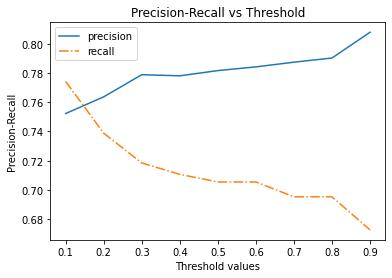

In [35]:
plt.plot(thresholds, precision_hist)
plt.plot(thresholds, recall_hist, '-.')

plt.xlabel("Threshold values")
plt.ylabel("Precision-Recall")
plt.title('Precision-Recall vs Threshold')
plt.legend(['precision','recall'])
plt.show()

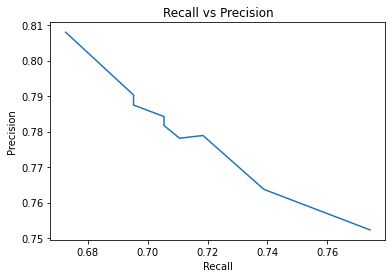

In [49]:
plt.plot(recall_hist, precision_hist)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Recall vs Precision')
plt.show()